In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Monthly ridership EDA

Data on ridership from the [Bart website](https://www.bart.gov/about/reports/ridership) for the year of 2023 is located in `ridership_data`. The folder contains data for Jan-September of 2023, correspondingly named `Ridership_202301` through `Ridership_202309`. Each xlsx file contains 4 sheets; Avg Weekday OD, Avg Saturday OD, Avg Sunday OD, Total Trips OD.

In each sheet, the index corresponds to the entry stations, and the column names correspond to the exit stations. Each dataset contains 50 rows and 50 columns.

I will explore total ridership for the month of January below.

In [6]:
jan_total_trips = pd.read_excel('data/ridership_data/ridership_2023/Ridership_202301.xlsx', sheet_name='Total Trips OD', header=1, index_col='Unnamed: 0') # from total trips OD
jan_total_trips.iloc[-1, -1]

3310812.0

Last row and last column of sheet contains total entries and exits. Seperating them from the main df:


In [3]:
jan_total_entries = jan_total_trips.iloc[len(jan_total_trips) - 1].iloc[:-1].to_frame()
total_entries_and_exits = jan_total_entries.iloc[-1]
jan_total_exits = jan_total_trips[jan_total_trips.columns[-1]].iloc[:-1].to_frame()

In [4]:
jan_total_trips = pd.read_excel('data/ridership_data/ridership_2023/Ridership_202301.xlsx', sheet_name='Total Trips OD', header=1, index_col='Unnamed: 0') # from total trips OD
jan_total_trips.drop(jan_total_trips.columns[len(jan_total_trips.columns)-1], axis=1, inplace=True) # dropping last row - contains total entries for each station
jan_total_trips.drop(jan_total_trips.tail(1).index,inplace=True) # dropping last column - contains total exits for each station
jan_total_trips.head() # first 5 rows; currently 50rx50c

,RM,EN,EP,NB,BK,AS,MA,19,12,LM,...,SB,SO,MB,WD,OA,WS,ML,BE,PC,AN
RM,528.0,1768.0,1433.0,840.0,5555.0,1124.0,1660.0,1260.0,1485.0,492.0,...,287.0,811.0,236.0,50.0,225.0,333.0,116.0,183.0,169.0,166.0
EN,1923.0,743.0,1461.0,959.0,7940.0,1513.0,2289.0,2776.0,3814.0,795.0,...,453.0,1435.0,503.0,169.0,543.0,448.0,308.0,377.0,71.0,179.0
EP,1490.0,1379.0,388.0,755.0,6333.0,906.0,1449.0,1780.0,2177.0,549.0,...,136.0,905.0,230.0,70.0,372.0,163.0,145.0,165.0,41.0,73.0
NB,927.0,805.0,787.0,457.0,1983.0,738.0,951.0,1634.0,1437.0,417.0,...,85.0,1298.0,252.0,33.0,484.0,197.0,161.0,181.0,42.0,71.0
BK,6245.0,8577.0,6506.0,2198.0,1107.0,3471.0,3665.0,4305.0,4640.0,1671.0,...,318.0,3146.0,1073.0,229.0,1578.0,595.0,938.0,1283.0,194.0,472.0


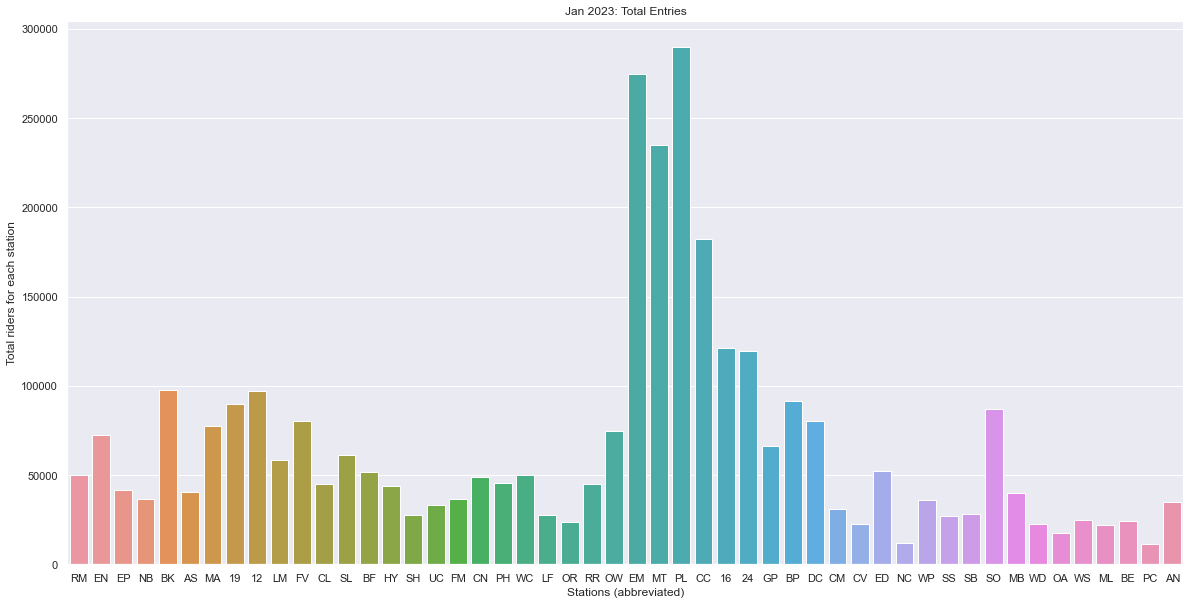

In [7]:
sns.barplot(data=jan_total_entries, x=jan_total_entries.index, y=jan_total_entries['Entries'])
sns.set(rc={'figure.figsize':(20,10)})
plt.title('Jan 2023: Total Entries')
plt.xlabel('Stations (abbreviated)')
plt.ylabel('Total riders for each station');

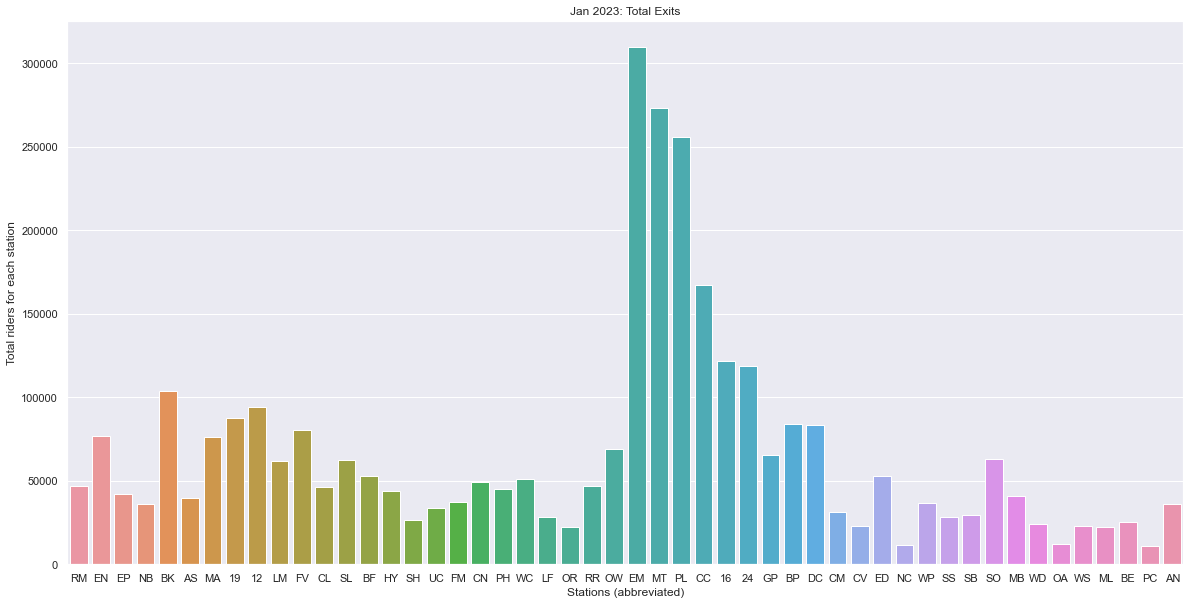

In [6]:
sns.barplot(data=jan_total_exits, x=jan_total_exits.index, y=jan_total_exits['Exits'])
sns.set(rc={'figure.figsize':(20,10)})
plt.title('Jan 2023: Total Exits')
plt.xlabel('Stations (abbreviated)')
plt.ylabel('Total riders for each station');

## Annual ridership (1973-2020)

Data on annual ridership from the [Bart website](https://www.bart.gov/about/reports/ridership) for the period of the fiscal years of 1973-2020 is located in `ridership_data` under `BART_Ridership_FY73_FY20`.

In [8]:
ann_rider = pd.read_excel('data/ridership_data/BART_Ridership_FY73_FY20.xlsx', header=2, index_col='Fiscal Year')
ann_rider=ann_rider.tail(-1) # removing first row
ann_rider.drop(ann_rider.tail(2).index,inplace=True)
ann_rider.head()

,Total Annual Exits,Annual % Change,Average Weekday Exits,Annual % Change.1,Average Saturday Exits,Annual % Change.2,Average Sunday Exits,Annual % Change.3,Unnamed: 9,Annualization
Fiscal Year,,,,,,,,,,
FY73,4591241.0,NaN,32000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FY74,13960680.0,2.040720,57399.5,0.793734,NaN,NaN,NaN,NaN,NaN,NaN
FY75,27876794.0,0.996808,118003,1.055819,NaN,NaN,NaN,NaN,NaN,NaN
FY76,32897431.0,0.180101,131000,0.110141,NaN,NaN,NaN,NaN,NaN,NaN
FY77,34599088.0,0.051726,133453,0.018725,NaN,NaN,NaN,NaN,NaN,NaN


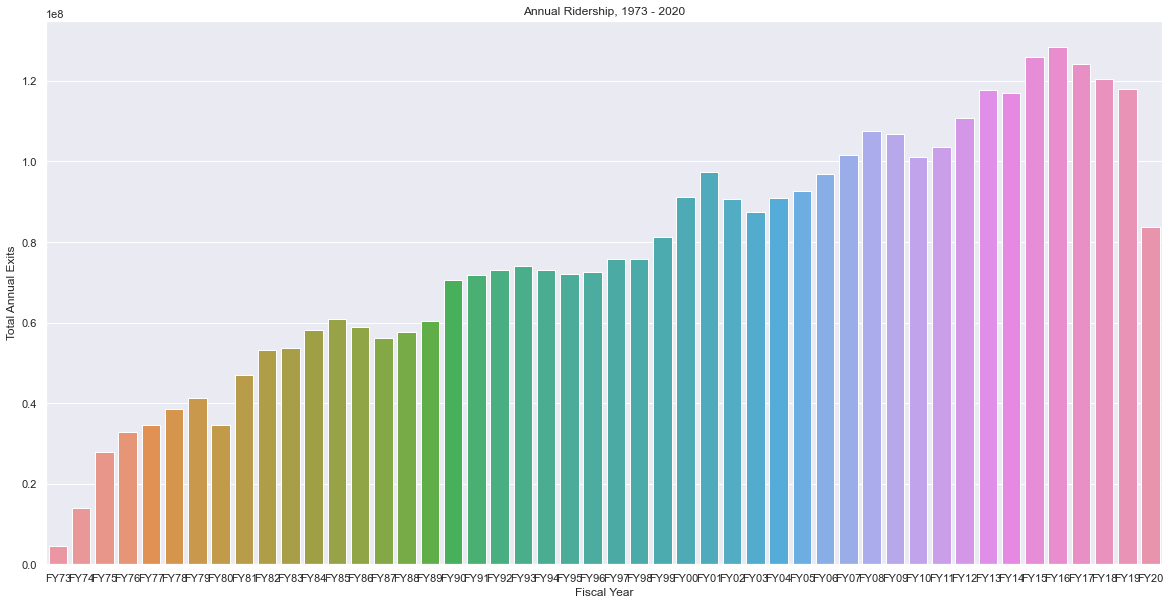

In [10]:
sns.barplot(data=ann_rider, x=ann_rider.index, y=ann_rider['Total Annual Exits'])
plt.title('Annual Ridership, 1973 - 2020')
plt.xlabel('Fiscal Year');

Text(0.5, 1.0, 'Annual Ridership, 2000 - 2020')

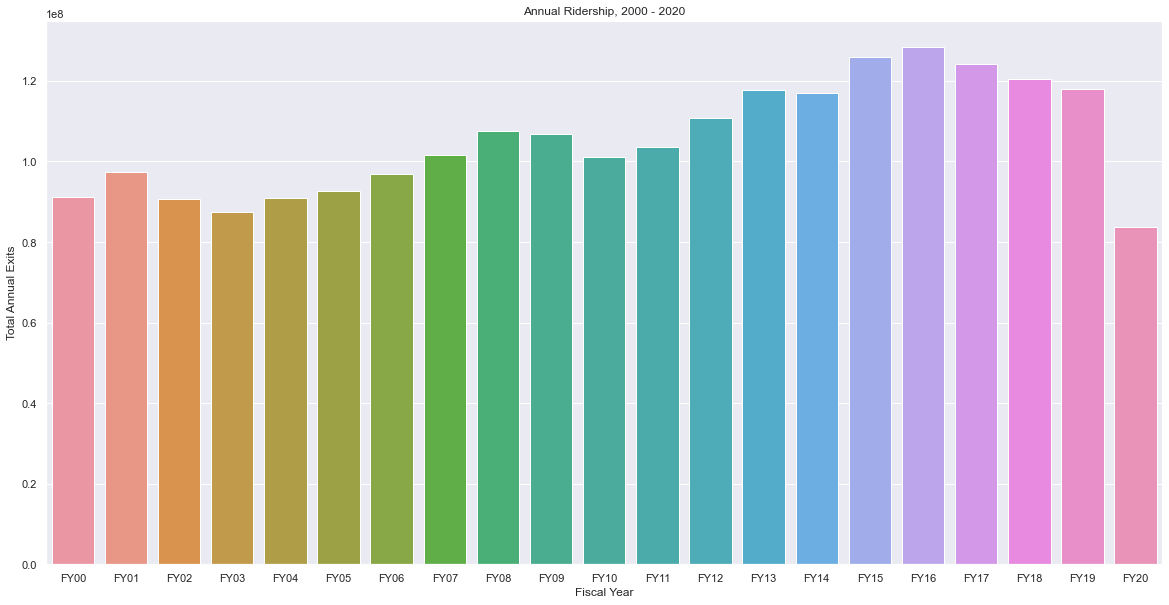

In [11]:
sns.barplot(data=ann_rider.iloc[27:], x=ann_rider.iloc[27:].index, y=ann_rider.iloc[27:]['Total Annual Exits'])
plt.title('Annual Ridership, 2000 - 2020')

To do: Compile annual data from years 2021 and 2022

In [41]:
import os, sys
# sys.path.append(os.path.join(os.path.dirname(__file__), "lib"))

rider_21, rider_22, rider_23 = [], [], []

for file in os.scandir('data/ridership_data/ridership_2021'):
    if file.is_file():
        rider_21.append(file.name)

for file in os.scandir('data/ridership_data/ridership_2022'):
    if file.is_file():
        rider_22.append(file.name) 

for file in os.scandir('data/ridership_data/ridership_2023'):
    if file.is_file():
        rider_23.append(file.name)

['Ridership_202101.xlsx',
 'Ridership_202106.xlsx',
 'Ridership_202110.xlsx',
 'Ridership_202111.xlsx',
 'Ridership_202107.xlsx',
 'Ridership_202112.xlsx',
 'Ridership_202104.xlsx',
 'Ridership_202108.xlsx',
 'Ridership_202109.xlsx',
 'Ridership_202105.xlsx',
 'Ridership_202102.xlsx',
 'Ridership_202103.xlsx']

In [44]:
import os

total_entries_and_exits_21_23 = {}

for filename in os.listdir('data/ridership_data/ridership_2021'):
    f = os.path.join('data/ridership_data/ridership_2021', filename)
    # checking if it is a file
    excel = pd.read_excel(f)
    total_entries_and_exits_21_23[filename[10:16]] = excel.iloc[-1, -1]

In [45]:
for filename in os.listdir('data/ridership_data/ridership_2022'):
    f = os.path.join('data/ridership_data/ridership_2022', filename)
    # checking if it is a file
    excel = pd.read_excel(f)
    total_entries_and_exits_21_23[filename[10:16]] = excel.iloc[-1, -1]

In [46]:
for filename in os.listdir('data/ridership_data/ridership_2023'):
    f = os.path.join('data/ridership_data/ridership_2023', filename)
    # checking if it is a file
    excel = pd.read_excel(f)
    total_entries_and_exits_21_23[filename[10:16]] = excel.iloc[-1, -1]

In [47]:
total_entries_and_exits_21_23

{'202101': 43011.94736842103,
 '202106': 75962.50000000001,
 '202110': 108644.61904761904,
 '202111': 106454.49999999997,
 '202107': 83491.3181818182,
 '202112': 98658.04347826088,
 '202104': 57885.909090909096,
 '202108': 92401.81818181819,
 '202109': 103176.68181818181,
 '202105': 64933.799999999996,
 '202102': 47664.52631578948,
 '202103': 51595.47826086955,
 '202209': 155235.8181818182,
 '202205': 132160.7272727273,
 '202204': 132180.6666666667,
 '202212': 125769.22727272724,
 '202208': 143396.56521739133,
 '202203': 124094.26086956526,
 '202202': 103173.00000000004,
 '202201': 83790.47619047621,
 '202207': 130417.80952380956,
 '202211': 138853.09090909094,
 '202210': 154932.0476190476,
 '202206': 140563.54545454544,
 '202301': 126345.95454545453,
 '202307': 149296.00000000003,
 '202306': 157015.86363636356,
 '202305': 153707.5217391305,
 '202309': 165026.57142857142,
 '202308': 164875.8260869565,
 '202304': 157264.00000000003,
 '202303': 149051.08695652173,
 '202302': 145265.19999

In [48]:
monthly_ridership = pd.DataFrame.from_dict(total_entries_and_exits_21_23, orient='index')
monthly_ridership

,0
202101,43011.947368
202106,75962.500000
202110,108644.619048
202111,106454.500000
202107,83491.318182
202112,98658.043478
202104,57885.909091
202108,92401.818182
202109,103176.681818
202105,64933.800000


<AxesSubplot:ylabel='0'>

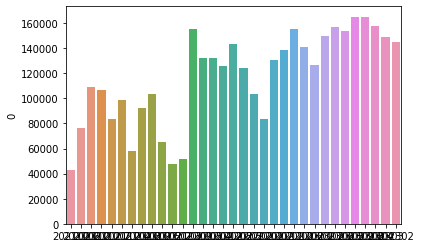

In [49]:
sns.barplot(data=monthly_ridership, x=monthly_ridership.index, y=monthly_ridership[0])